# Домашнее задание №5

Data Set Information:

The dataset was acquired and annotated by professional physicians at 'Hospital Universitario de Caracas'.
The subjective judgments (target variables) were originally done in an ordinal manner (poor, fair, good, excellent) and was discretized in two classes (bad, good).
Images were randomly sampled from the original colposcopic sequences (videos).
The original images and the manual segmentations are included in the 'images' directory.
The dataset has three modalities (i.e. Hinselmann, Green, Schiller).
The target variables are expert::X (X in 0,...,5) and consensus.
cervix_area: image area with cervix.

os_area: image area with external os.

walls_area: image area with vaginal walls.

speculum_area: image area with the speculum.

artifacts_area: image area with artifacts.

cervix_artifacts_area: cervix area with the artifacts.

os_artifacts_area: external os area with the artifacts.

walls_artifacts_area: vaginal walls with the artifacts.

speculum_artifacts_area: speculum area with the artifacts.

cervix_specularities_area: cervix area with the specular reflections.

os_specularities_area: external os area with the specular reflections.

walls_specularities_area: vaginal walls area with the specular reflections.

speculum_specularities_area: speculum area with the specular reflections.

specularities_area: total area with specular reflections.

area_h_max_diff: maximum area differences between the four cervix quadrants.

rgb_cervix_r_mean: average color information in the cervix (R channel).

rgb_cervix_r_std: stddev color information in the cervix (R channel).

rgb_cervix_r_mean_minus_std: (avg - stddev) color information in the cervix (R channel).

rgb_cervix_r_mean_plus_std: (avg + stddev) information in the cervix (R channel).

rgb_cervix_g_mean: average color information in the cervix (G channel).

rgb_cervix_g_std: stddev color information in the cervix (G channel).

rgb_cervix_g_mean_minus_std: (avg - stddev) color information in the cervix (G channel).

rgb_cervix_g_mean_plus_std: (avg + stddev) color information in the cervix (G channel).

rgb_cervix_b_mean: average color information in the cervix (B channel).

rgb_cervix_b_std: stddev color information in the cervix (B channel).

rgb_cervix_b_mean_minus_std: (avg - stddev) color information in the cervix (B channel).

rgb_cervix_b_mean_plus_std: (avg + stddev) color information in the cervix (B channel).

rgb_total_r_mean: average color information in the image (B channel).

rgb_total_r_std: stddev color information in the image (R channel).

rgb_total_r_mean_minus_std: (avg - stddev) color information in the image (R channel).

rgb_total_r_mean_plus_std: (avg + stddev) color information in the image (R channel).

rgb_total_g_mean: average color information in the image (G channel).

rgb_total_g_std: stddev color information in the image (G channel).

rgb_total_g_mean_minus_std: (avg - stddev) color information in the image (G channel).

rgb_total_g_mean_plus_std: (avg + stddev) color information in the image (G channel).

rgb_total_b_mean: average color information in the image (B channel).

rgb_total_b_std: stddev color information in the image (B channel).

rgb_total_b_mean_minus_std: (avg - stddev) color information in the image (B channel).

rgb_total_b_mean_plus_std: (avg + stddev) color information in the image (B channel).

hsv_cervix_h_mean: average color information in the cervix (H channel).

hsv_cervix_h_std: stddev color information in the cervix (H channel).

hsv_cervix_s_mean: average color information in the cervix (S channel).

hsv_cervix_s_std: stddev color information in the cervix (S channel).

hsv_cervix_v_mean: average color information in the cervix (V channel).

hsv_cervix_v_std: stddev color information in the cervix (V channel).

hsv_total_h_mean: average color information in the image (H channel).

hsv_total_h_std: stddev color information in the image (H channel).

hsv_total_s_mean: average color information in the image (S channel).

hsv_total_s_std: stddev color information in the image (S channel).

hsv_total_v_mean: average color information in the image (V channel).

hsv_total_v_std: stddev color information in the image (V channel).

fit_cervix_hull_rate: Coverage of the cervix convex hull by the cervix.

fit_cervix_hull_total: Image coverage of the cervix convex hull.

fit_cervix_bbox_rate: Coverage of the cervix bounding box by the cervix.

fit_cervix_bbox_total: Image coverage of the cervix bounding box.

fit_circle_rate: Coverage of the cervix circle by the cervix.

fit_circle_total: Image coverage of the cervix circle.

fit_ellipse_rate: Coverage of the cervix ellipse by the cervix.

fit_ellipse_total: Image coverage of the cervix ellipse.

fit_ellipse_goodness: Goodness of the ellipse fitting.

dist_to_center_cervix: Distance between the cervix center and the image center.

dist_to_center_os: Distance between the cervical os center and the image center.

experts::0: subjective assessment of the Expert 0 (target variable). experts::1: subjective assessment of the Expert 1 (target variable). experts::2: subjective assessment of the Expert 2 (target variable). experts::3: subjective assessment of the Expert 3 (target variable). experts::4: subjective assessment of the Expert 4 (target variable). experts::5: subjective assessment of the Expert 5 (target variable). consensus: subjective assessment of the consensus (target variable)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Считывание данных

In [2]:
data = pd.read_csv('green.csv', sep = ',', engine = 'python')

Задаем x и y

In [3]:
X = data.drop(('consensus'), axis = 1)
y = data['consensus']

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y.unique())
y_tr = le.transform(y)

Разобьем выборку на тестовую и обучаемую

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)
N_test, _ = X_test.shape

# Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

Объявим массивы ошибок

In [32]:
test_err_RF = []
train_err_RF = []
oob_err_RF = []

In [33]:
import warnings
warnings.filterwarnings('ignore')

n_estimators = np.arange(1, 50, 1)

for count in n_estimators:
    rf_model = RandomForestClassifier(n_estimators = count, warm_start = True, oob_score = True)
    rf_model.fit(X_train, y_train)
    
    y_train_pred = rf_model.predict(X_train)
    y_test_pred = rf_model.predict(X_test)
    
    train_err_RF.append(np.mean(y_train != y_train_pred))
    test_err_RF.append(np.mean(y_test != y_test_pred))
    
    oob_err_RF.append(1 - rf_model.oob_score_)

In [34]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.151515151515


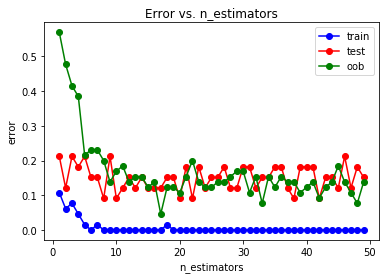

In [35]:
plt.plot(n_estimators, train_err_RF, 'b-o', label = 'train')
plt.plot(n_estimators, test_err_RF, 'r-o', label = 'test')
plt.plot(n_estimators, oob_err_RF, 'g-o', label = 'oob')
plt.title('Error vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()
pass

Минимальные значения ошибок на обучающей и тестовой выборке

In [36]:
min_train_err = np.min(train_err_RF)
min_test_err_RF = np.min(test_err_RF)
print(min_train_err, min_test_err_RF)

0.0 0.0909090909091


Недообучения не наблюдается, т. к. на обучающей выборке ошибка примерно равна нулю. Переобучение так же не наблюдается из- за отсутвия значительного роста ошибки, да и среднее ее значение не так велико

In [39]:
for i in range(len(test_err_RF)):
    if((test_err_RF[i] == min_test_err_RF) and (train_err_RF[i] == min_train_err)):
        n_estimator_opt = n_estimators[i]
        break
print(n_estimator_opt)

8


Для достижения подобного результата достаточно 8 деревьев 

# Extremely Random Trees

In [40]:
from sklearn.ensemble import ExtraTreesClassifier

Объявляем массивы ошибок

In [41]:
test_err_ERT = []
train_err_ERT = []
oob_err_ERT = []

In [43]:
import warnings
warnings.filterwarnings('ignore')

for count in n_estimators:
    ERT_model = ExtraTreesClassifier(n_estimators=count, bootstrap=True, oob_score = True)
    ERT_model.fit(X_train, y_train)
    
    y_train_pred = ERT_model.predict(X_train)
    y_test_pred = ERT_model.predict(X_test)
    
    train_err_ERT.append(np.mean(y_train != y_train_pred))
    test_err_ERT.append(np.mean(y_test != y_test_pred))
    
    oob_err_ERT.append(1 - ERT_model.oob_score_)

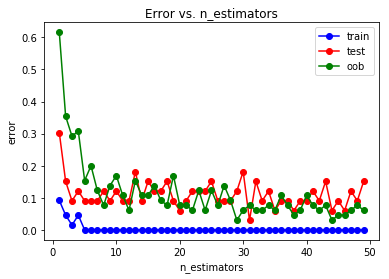

In [45]:
plt.plot(n_estimators, train_err_ERT, 'b-o', label = 'train')
plt.plot(n_estimators, test_err_ERT, 'r-o', label = 'test')
plt.plot(n_estimators, oob_err_ERT, 'g-o', label = 'oob')
plt.title('Error vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()
pass

Минимальные значения ошибок на обучающей и тестовой выборке

In [46]:
min_train_err = np.min(train_err_ERT)
min_test_err_ERT = np.min(test_err_ERT)
print(min_train_err, min_test_err_ERT)

0.0 0.030303030303


Недообучение не наблюдается, так же как и переобучение из- за малого значения ошибки на выборках и отсутствия значительного роста ошибки

In [49]:
for i in range(len(test_err_ERT)):
    if((test_err_ERT[i] == min_test_err_ERT) and (train_err_ERT[i] == min_train_err)):
        n_estimator_opt = n_estimators[i]
        break
print(n_estimator_opt)

31


Для достижения оптимального значения достаточно 31 дерева

# AdaBoost

In [50]:
from sklearn.ensemble import AdaBoostClassifier

Объявляем массивы ошибок 

In [51]:
test_err_AB = []
train_err_AB = []
oob_err_AB = []

In [52]:
import warnings
warnings.filterwarnings('ignore')

for count in n_estimators:
    AB_model = AdaBoostClassifier(n_estimators = count)
    AB_model.fit(X_train, y_train)
    
    y_train_pred = AB_model.predict(X_train)
    y_test_pred = AB_model.predict(X_test)
    
    train_err_AB.append(np.mean(y_train != y_train_pred))
    test_err_AB.append(np.mean(y_test != y_test_pred))

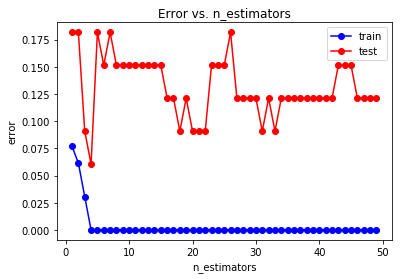

In [53]:
plt.plot(n_estimators, train_err_AB, 'b-o', label = 'train')
plt.plot(n_estimators, test_err_AB, 'r-o', label = 'test')
plt.title('Error vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()
pass

Минимальные значения ошибок на обучающей и тестовой выборке

In [54]:
min_train_err = np.min(train_err_AB)
min_test_err_AB = np.min(test_err_AB)
print(min_train_err, min_test_err_AB)

0.0 0.0606060606061


Недообучение не наблюдается, поскольку величина ошибки на обучаемой выборке примерно равна нулю. Ошибка на тестовой выборке ведет себя скачкообразно, но переобучение не наблюдается

In [55]:
for i in range(len(test_err_AB)):
    if((test_err_AB[i] == min_test_err_AB) and (train_err_AB[i] == min_train_err)):
        n_estimator_opt = n_estimators[i]
        break
print(n_estimator_opt)

4


Подобного результата можно достичь при количестве деревьев равном 4

# Gradient Boosted Trees

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

 Объявляем массивы ошибок

In [57]:
test_err_GBT = []
train_err_GBT = []
oob_err_GBT = []

In [58]:
for count in n_estimators:
    GBT_model = GradientBoostingClassifier(n_estimators=count)
    GBT_model.fit(X_train, y_train)
    
    y_train_pred = GBT_model.predict(X_train)
    y_test_pred = GBT_model.predict(X_test)
    
    train_err_GBT.append(np.mean(y_train != y_train_pred))
    test_err_GBT.append(np.mean(y_test != y_test_pred))

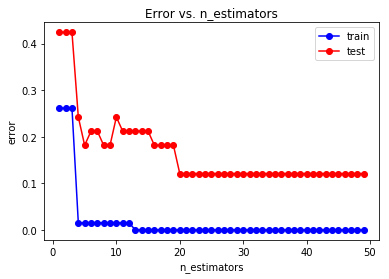

In [60]:
plt.plot(n_estimators, train_err_GBT, 'b-o', label = 'train')
plt.plot(n_estimators, test_err_GBT, 'r-o', label = 'test')
plt.title('Error vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()
pass

Минимальные значения ошибок на обучающей и тестовой выборке

In [61]:
min_train_err = np.min(train_err_GBT)
min_test_err_GBT = np.min(test_err_GBT)
print(min_train_err, min_test_err_GBT)

0.0 0.121212121212


Недообучения как и в предыдущих случаях не наблюдается из- за нулевой ошибки на обучающей выборке. Ошибка на тестовой выборке снижается только после 20 деревьев и становится стабильной, не достигая нулевого значения. С такими показателями врят ли можно говорить о переобучении.

In [62]:
for i in range(len(test_err_GBT)):
    if((test_err_GBT[i] == min_test_err_GBT) and (train_err_GBT[i] == min_train_err)):
        n_estimator_opt = n_estimators[i]
        break
print(n_estimator_opt)

20


Сравним графики ошибки на тестовой выборке

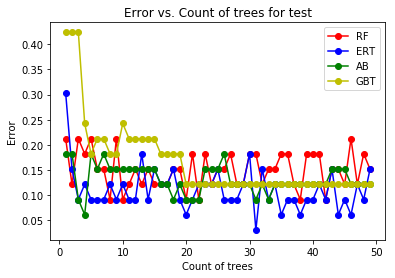

In [66]:
plt.plot(n_estimators, test_err_RF, 'r-o', label = 'RF')
plt.plot(n_estimators, test_err_ERT, 'b-o', label = 'ERT')
plt.plot(n_estimators, test_err_AB, 'g-o', label = 'AB')
plt.plot(n_estimators, test_err_GBT, 'y-o', label = 'GBT')
plt.title('Error vs. Count of trees for test')
plt.xlabel('Count of trees')
plt.ylabel('Error')
plt.legend()
pass

In [65]:
print(min_test_err_RF, min_test_err_ERT, min_test_err_AB, min_test_err_GBT)

0.0909090909091 0.030303030303 0.0606060606061 0.121212121212


На основе полученных результатов нельзя выделить какой- то самый хороший алгоритм. Extremely Random Trees имеет самую малую ошибку, но довольно не стабилен исходя из графика. Gradient Boosted Trees напротив обретает стабильную ошибку после 20 деревьев, но эта ошибка довольно таки велика.